In [1]:
# Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# other
import os
import joblib
import tarfile
import urllib

### SkLearn
from sklearn import datasets

# Metrics
from sklearn.metrics import silhouette_score, accuracy_score, r2_score

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

# Validating and Tuning
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Supervised Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Cluster ALgorithm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import MiniBatchKMeans

### KMeans

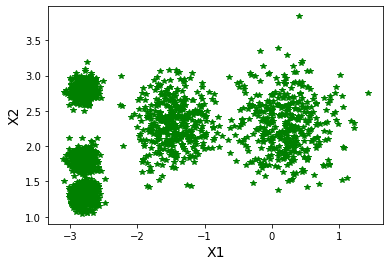

In [2]:
## make some datasets
blob_centers = np.array(
                    [[ 0.2,  2.3],
                     [-1.5,  2.3],
                     [-2.8,  1.8],
                     [-2.8,  2.8],
                     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

## using make_blobs
X, y = datasets.make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

### Plotting
plt.figure(figsize=(6, 4))
plt.plot(X[:,0], X[:,1], 'g*')
plt.xlabel('X1', fontsize=14)
plt.ylabel('X2', fontsize=14)
plt.show()

y_pred => 
 [3 0 2 ... 0 3 1]
from _labels => 
 [3 0 2 ... 0 3 1]
centroids => 
 [[ 0.20925539  2.30351618]
 [-2.80372723  1.80873739]
 [-1.4453407   2.32051326]
 [-2.79846237  2.80004584]
 [-2.79244799  1.2973862 ]]


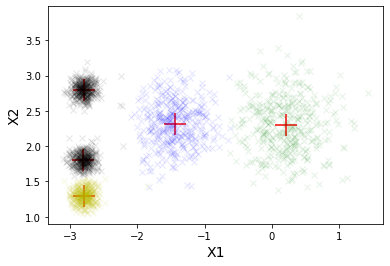

In [3]:
### Define KMeans

## n_clusters >> define number of clusters let's start with 4 clusters
## n_init >> 10 , number of initialization and clustering ,
### the algorithm make 10 initalization of random centroids and get the inertia, 
### and finally show the best one (less inertia)
## algorithm='auto', to support accelerated Kmeans (it is prefeable (default)) 
### accelerated Kmeans is avoiding many unnecessary distances calculations
## init='k-means++' >> this leads to kmeans++(preferable and it is the default)
kmeans = KMeans(n_clusters=5, n_init=10, algorithm='auto', init='k-means++', random_state=42)

y_pred = kmeans.fit_predict(X)

print('y_pred => \n', y_pred)
print('=='*15)
print('from _labels => \n', kmeans.labels_)
print('=='*15)

cenroids = kmeans.cluster_centers_
print('centroids => \n', cenroids)
print('=='*15)

### Plotting
plt.figure(figsize=(6, 4))

plt.plot(X[y_pred==0][:,0], X[y_pred==0][:,1], 'gx', alpha=0.1)
plt.plot(X[y_pred==1][:,0], X[y_pred==1][:,1], 'kx', alpha=0.1)
plt.plot(X[y_pred==2][:,0], X[y_pred==2][:,1], 'bx', alpha=0.1)
plt.plot(X[y_pred==3][:,0], X[y_pred==3][:,1], 'kx', alpha=0.1)
plt.plot(X[y_pred==4][:,0], X[y_pred==4][:,1], 'yx', alpha=0.1)

plt.scatter(cenroids[:,0], cenroids[:,1], s=500, c='r', marker='+')
plt.xlabel('X1', fontsize=14)
plt.ylabel('X2', fontsize=14)
plt.show()

In [4]:
### you can get distances for each instance to centroids

X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
print('Prediction is \n', kmeans.predict(X_new))
print('=='*15)

distances = kmeans.transform(X_new)
print('distances to each centroids => \n', distances)

Prediction is 
 [0 0 3 3]
distances to each centroids => 
 [[0.36865958 2.81024337 1.48045212 2.91057812 2.87948466]
 [2.80720102 5.80687792 4.45688037 5.85339553 5.8349053 ]
 [3.28396253 1.20732332 1.69666372 0.28389977 1.71521765]
 [3.21526454 0.7185868  1.56498595 0.36144837 1.22039247]]


#### Cost Function

`Inertia`

In [5]:
print('kmeans.inertia_ =>', kmeans.inertia_)
print('==='*15)
print('score = (negative (inertia))', kmeans.score(X))

kmeans.inertia_ => 213.42177131258921
score = (negative (inertia)) -213.42177131258924


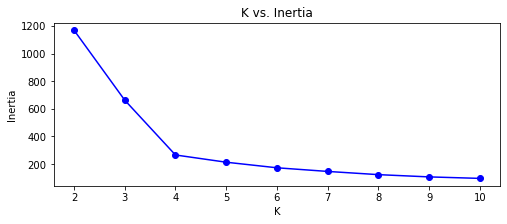

In [6]:
### try diffrent K and plot inertias
K = np.arange(2, 11)

inertias = []

for k in K:
    kmeans_new = KMeans(n_clusters=k)
    kmeans_new.fit(X)
    inertias.append(kmeans_new.inertia_)
    
    
## Plotting
plt.figure(figsize=(8, 3))
plt.plot(K, inertias, 'bo-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('K vs. Inertia')
plt.show()  ### using elbow method , here k=4 is the best , but let's use other metrics to see

` try silhouette`
$$silhouette score = (b - a) / max(a, b)$$

` this score ranges(-1,1) , the greater is better near 1`

In [7]:
## try silhouette
silhouette_score(X, kmeans.labels_)

0.656578194104489

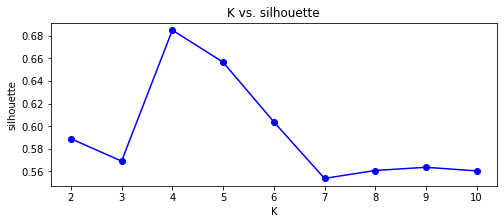

In [8]:
### try diffrent K and plot silhouette

K = np.arange(2, 11)

silhouette_arr = []

for k in K:
    kmeans_new = KMeans(n_clusters=k)
    kmeans_new.fit(X)
    silhouette_arr.append(silhouette_score(X, kmeans_new.labels_))
    
## Plotting
plt.figure(figsize=(8, 3))
plt.plot(K, silhouette_arr, 'bo-')
plt.xlabel('K')
plt.ylabel('silhouette')
plt.title('K vs. silhouette')
plt.show()   ### here , K=4 is the max score >>> it is preferable to use K=4

#### let's move to the final diagram
`take this code as it is but modify carefullt`

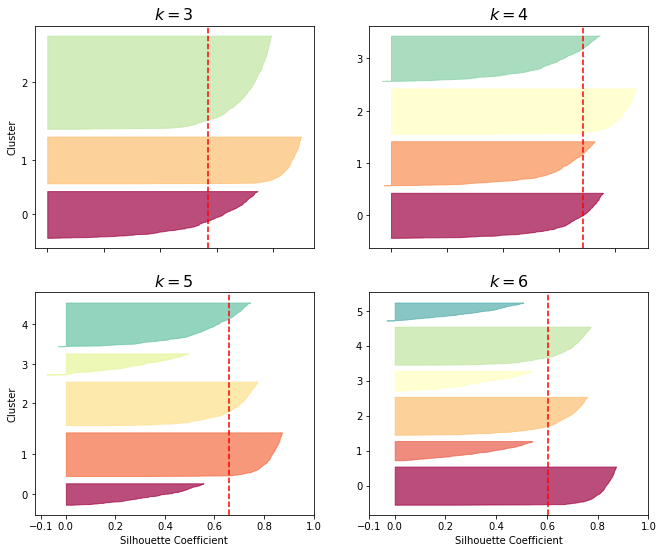

In [9]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                        for k in range(2, 11)]  ### note , K(from (2-11)) the same as silhouette

plt.figure(figsize=(11, 9))
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5, 7):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_arr[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()  ### it shows that 4 and 5 is the best , we can choose 5

### Using Clustering for Image Segmentation
` we simply assign pixels to the same segment if they have similar colors`

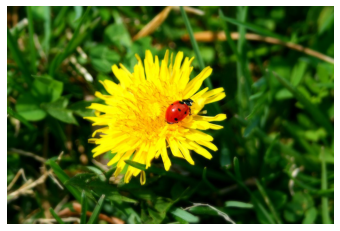

In [10]:
### read the image in the images folder

image_path = os.path.join('images', 'ladybug.png')
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [11]:
print('image.shape =>', image.shape)
print('==='*20)

image.shape => (533, 800, 3)


y_pred_images => [0 0 0 ... 3 3 0]
centroids_images => [[0.02144614 0.10687998 0.00563096]
 [0.98306316 0.93282324 0.02554025]
 [0.3647774  0.51811224 0.15160328]
 [0.09356943 0.24590509 0.01563101]
 [0.87640226 0.7178196  0.03669683]
 [0.21083784 0.3783042  0.05408566]
 [0.7645364  0.2003958  0.04399328]
 [0.60716176 0.62781763 0.38445237]]


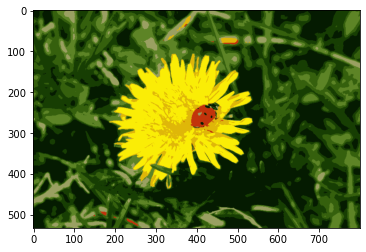

In [12]:
## reshape it to be (2d) with (533*800 rows and 3 columns)
X_reshaped = image.reshape(-1,3)

kmeans_images = KMeans(n_clusters=8).fit(X_reshaped)
y_pred_images = kmeans_images.labels_
print('y_pred_images =>', y_pred_images)
print('==='*20)
centroids_images = kmeans_images.cluster_centers_
print('centroids_images =>', centroids_images)
print('==='*20)

### this line of code is very very impoerant and smart 
### what is doing , it simply represent the y_pred of each row with its reprsented centroids
image_new_8clusters = centroids_images[y_pred_images].reshape(image.shape)
plt.imshow(image_new_8clusters); ### with 8 cluster, let's try some others

In [13]:
## reshape it to be (2d) with (533*800 rows and 3 columns)
X_reshaped = image.reshape(-1,3)

K = [2,4,6,8,10,12]

y_final_pred_all = {}

for k in K:
    kmeans_images = KMeans(n_clusters=k).fit(X_reshaped)
    y_pred_images = kmeans_images.labels_
    centroids_images = kmeans_images.cluster_centers_
    ### this line of code is very very impoerant and smart 
    ### what is doing , it simply represent the y_pred of each row with its reprsented centroids
    y_final_pred_all[k] = centroids_images[y_pred_images].reshape(image.shape)


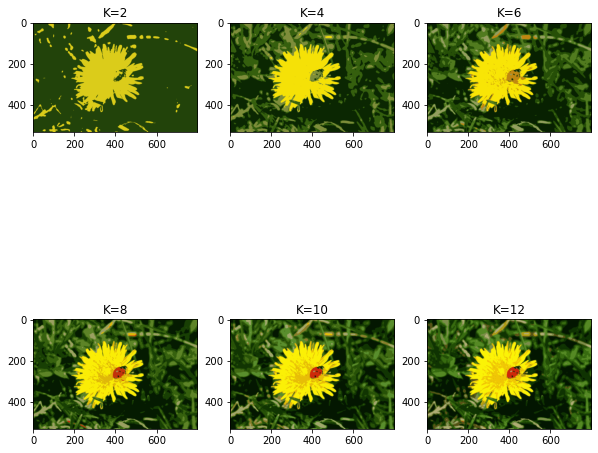

In [14]:
### plotting these diffrent photos under diffrent K (clustering for Image segmentation)

fig, ax = plt.subplots(2, 3, figsize=(10, 10))

plt.sca(ax[0,0])
plt.imshow(y_final_pred_all[2])
plt.title('K=2')

################

plt.sca(ax[0,1])
plt.imshow(y_final_pred_all[4])
plt.title('K=4')

################

plt.sca(ax[0,2])
plt.imshow(y_final_pred_all[6])
plt.title('K=6')

################

plt.sca(ax[1,0])
plt.imshow(y_final_pred_all[8])
plt.title('K=8')

################

plt.sca(ax[1,1])
plt.imshow(y_final_pred_all[10])
plt.title('K=10')

################

plt.sca(ax[1,2])
plt.imshow(y_final_pred_all[12])
plt.title('K=12')

plt.show()

## Using Clustering for Preprocessing

In [15]:
### use dataset of load_digits (simple of MNIST)

X_digits, y_digits = datasets.load_digits(return_X_y=True)

## split the data
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)                            

In [16]:
 ## train a Logistic Regression Model
log_reg = LogisticRegression(multi_class="ovr", 
                             solver="lbfgs", 
                               max_iter=5000, 
                               random_state=42)
log_reg.fit(X_train, y_train)

print('score on test =>', log_reg.score(X_test, y_test)) ## we can achieve more

score on test => 0.96


In [17]:
### reduce dimensions by clustering and then make a new features with the 
### distance between each instance and the clusters then train the model 

pipeline = Pipeline([
                    ('kmeans', KMeans(n_clusters=50, random_state=42)),
                    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", 
                                                   max_iter=5000, 
                                                   random_state=42))
                    ])
### first try this
pipeline.fit(X_train, y_train)

## score 
pipeline.score(X_test, y_test) ### we can achieve more using Grid search

0.9755555555555555

In [18]:
### to use grid search

pipeline = Pipeline([
                    ('kmeans', KMeans(n_clusters=50, random_state=42)),
                    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", 
                                                   max_iter=5000, 
                                                   random_state=42))
                    ])

params_best = {'kmeans__n_clusters': np.arange(50,400,20)}
grid_log_clust = GridSearchCV(pipeline, param_grid=params_best, cv=3, scoring='accuracy', n_jobs=-1)

grid_log_clust.fit(X_train, y_train)

## score
best_params = grid_log_clust.best_params_
print('best_params =>', best_params)
print('==='*20)
score = grid_log_clust.score(X_test, y_test)
print('score =>', score)

best_params => {'kmeans__n_clusters': 90}
score => 0.9777777777777777


## Using Clustering for semi superVised Learning

`clustering and then take the nearest instance near the centroids and label them manually` <br />
` then if you train your model it will not perform worse as you train in rpresentative data`

In [19]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=6000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

print('score =>', log_reg.score(X_test[:n_labeled], y_test[:n_labeled]))

score => 0.78


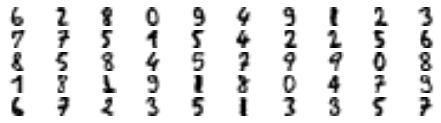

In [20]:
### what about clustering
k = 50
kmean_semi = KMeans(n_clusters=k, random_state=42)

## get the argmin(distance of each instance to each centroids)
X_distances = kmean_semi.fit_transform(X_train)

## axis=0, for each instance (first column for centroid of class 1 
## so i loop for rows (axis=0) get the nearest instance to each centroid)
idx_min = np.argmin(X_distances, axis=0) 

## get only the representative instances (closer to centroids )
X_train_represnt = X_train[idx_min]

## show these photos and manulally labeling them (domain expert)
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_train_represnt):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [31]:
y_labeled_manually = np.array([6, 2, 8, 0, 9, 4, 9, 1, 2, 3, 7, 7, 5, 1, 5, 4, 2, 2, 5, 6, 8, 5,
                               8, 4, 5, 7, 9, 9, 0, 8, 1, 8, 1, 9, 1, 8, 0, 4, 7, 9, 6, 7, 2, 3,
                               5, 1, 3, 3, 5, 7])

## train the model again 

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=6000, random_state=42)
log_reg.fit(X_train_represnt, y_labeled_manually)

print('score =>', log_reg.score(X_test, y_test))  ### beform much better the the above model

score => 0.9133333333333333


In [ ]:
## you can keep much further , for more look at the book page 254

## DBSCAN

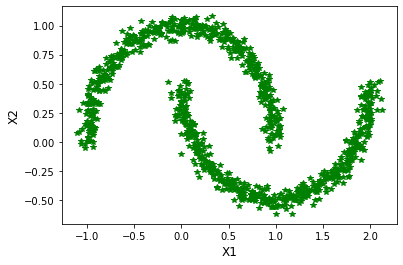

In [22]:
## Create dataset
X, y = datasets.make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.plot(X[:,0], X[:,1], 'g*')
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12);

In [23]:
## try with some criteria
## eps >> distance to the nearest instances
## min_samples , at least number to consider a cluster or a density zone
dbscan = DBSCAN(eps=0.09, min_samples=5)
dbscan.fit(X)

## if the result is -1 then it is outlier(anomaly)
labels_dbscan = pd.DataFrame(dbscan.labels_, columns=['labels'])

## unique of clusters
labels_dbscan['labels'].unique()

array([ 0,  1, -1], dtype=int64)

In [24]:
### the core indecies
core_indecies = dbscan.core_sample_indices_
core_indecies = pd.DataFrame(dbscan.core_sample_indices_, columns=['core_indecies'])
core_indecies ## 980 core 

,core_indecies
0,0
1,1
2,2
3,3
4,4
...,...
975,995
976,996
977,997
978,998


In [25]:
### the value of (X1 and X2) of core themselves is in
values_cores = dbscan.components_
values_cores = pd.DataFrame(values_cores, columns=['X1', 'X2'])
values_cores

,X1,X2
0,-0.021371,0.406186
1,0.976700,-0.458323
2,0.904059,-0.376520
3,0.377363,-0.397037
4,-0.841926,0.530587
...,...,...
975,0.798055,0.573064
976,-0.145492,0.952211
977,1.662585,-0.307919
978,-0.943559,0.327894


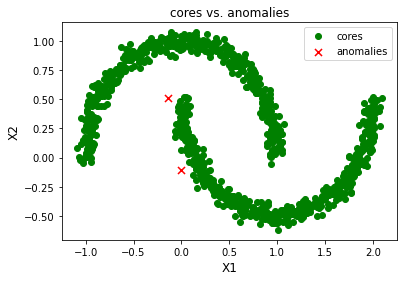

In [26]:
## plotting the cores vs. anomalies
plt.plot(values_cores['X1'], values_cores['X2'], 'go', label='cores')
plt.scatter(X[dbscan.labels_==-1][:,0], X[dbscan.labels_==-1][:,1], marker='x', 
            s=50, c='r', label='anomalies')
plt.title('cores vs. anomalies')
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.legend()
plt.show()

#### `DBSAN has no predict() method, to predict new instances you can define a classifier and go on`

In [27]:
knn = KNeighborsClassifier(n_neighbors=50)

## fit on core indecies and its output as shown below
## here X is the (X of cores) and y the output of their clusters
X_for_predict = dbscan.components_
y_for_predict = dbscan.labels_[dbscan.core_sample_indices_]
knn.fit(X_for_predict, y_for_predict)

## predict new 
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
results = knn.predict(X_new)
print('results => \n', results)
print('=='*15)
results_prob = knn.predict_proba(X_new)
print('results_prob => \n', results_prob)

results => 
 [1 0 1 0]
results_prob => 
 [[0.16 0.84]
 [1.   0.  ]
 [0.18 0.82]
 [1.   0.  ]]


## Gaussian Mixture Models (GMM)